In [ ]:
# Install required libraries for emotion analysis
!pip install transformers torch librosa --quiet

In [ ]:
# Import necessary packages
from transformers import pipeline
import librosa
import numpy as np


In [ ]:
# Emotion analysis from text (e.g., user mood input)
emotion_classifier = pipeline('text-classification', model='j-hartmann/emotion-english-distilroberta-base', return_all_scores=True)
def detect_emotion_from_text(text):
    results = emotion_classifier(text)[0]
    sorted_results = sorted(results, key=lambda x: x['score'], reverse=True)
    return sorted_results[0]['label'], sorted_results[0]['score']


In [ ]:
# Function to extract audio features (skeleton for emotion-based audio classification)
def extract_audio_features(file_path):
    y, sr = librosa.load(file_path, duration=30)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return np.mean(mfcc, axis=1)

# This would normally be used with a trained emotion classifier on audio features

<a href="https://colab.research.google.com/github/SrijaDasgupta/Spotify_Music_Recommendation/blob/main/Spotify_Music_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
cd/content/drive/MyDrive/Spotify_Music_Recommendation

/content/drive/MyDrive/Spotify_Music_Recommendation


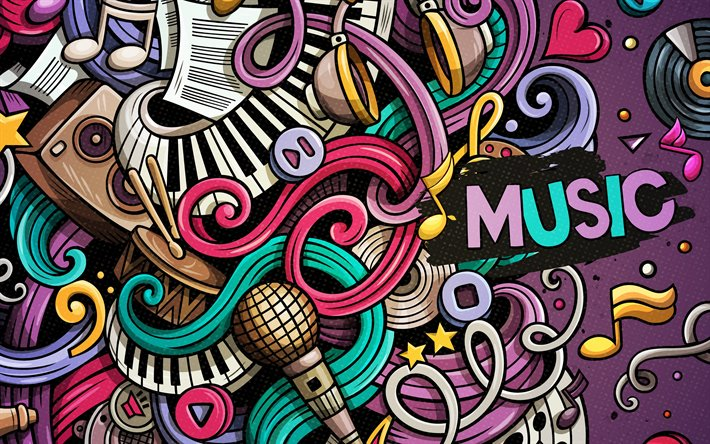

In [2]:
from IPython import display
from IPython.display import Image
display.Image("/content/__results___3_0.jpg")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier

In [4]:
artists_df = pd.read_csv('/content/spotify_artists.csv')
artists_df = artists_df.drop(['Unnamed: 0'], axis=1)
artists_df = artists_df.rename(columns = {'id':'artists_id'})
artists_df.head(2)

,artist_popularity,followers,genres,artists_id,name,track_id,track_name_prev,type
0,44,23230,"['sertanejo', 'sertanejo pop', 'sertanejo trad...",4mGnpjhqgx4RUdsIJiURdo,Juliano Cezar,0wmDmAILuW9e2aRttkl4aC,track_9,artist
1,22,313,[],1dLnVku4VQUOLswwDFvRc9,The Grenadines,4wqwj0gA8qPZKLl5WVqXml,track_30,artist


In [5]:
artists_df = artists_df.drop(['track_name_prev', 'type'], axis=1)

In [6]:
artists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56129 entries, 0 to 56128
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_popularity  56129 non-null  int64 
 1   followers          56129 non-null  int64 
 2   genres             56129 non-null  object
 3   artists_id         56129 non-null  object
 4   name               56128 non-null  object
 5   track_id           56129 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.6+ MB


In [7]:
artists_df.head(2)

,artist_popularity,followers,genres,artists_id,name,track_id
0,44,23230,"['sertanejo', 'sertanejo pop', 'sertanejo trad...",4mGnpjhqgx4RUdsIJiURdo,Juliano Cezar,0wmDmAILuW9e2aRttkl4aC
1,22,313,[],1dLnVku4VQUOLswwDFvRc9,The Grenadines,4wqwj0gA8qPZKLl5WVqXml


In [8]:
albums_df = pd.read_csv('/content/spotify_albums.csv')
albums_df = albums_df.drop(['Unnamed: 0'], axis=1)
albums_df = albums_df.rename(columns = {'id':'album_id'})
albums_df.head(2)

,album_type,artist_id,available_markets,external_urls,href,album_id,images,name,release_date,release_date_precision,total_tracks,track_id,track_name_prev,uri,type
0,single,3DiDSECUqqY1AuBP8qtaIa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/1g...,https://api.spotify.com/v1/albums/1gAM7M4rBwEb...,1gAM7M4rBwEbSPeAQR2nx1,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",If I Ain't Got You EP,2019-02-08,day,6,2iejTMy9XZ8Gaae0aQ2yl0,track_32,spotify:album:1gAM7M4rBwEbSPeAQR2nx1,album
1,album,6s1pCNXcbdtQJlsnM1hRIA,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/4K...,https://api.spotify.com/v1/albums/4KfJZV7WfolY...,4KfJZV7WfolYlxBzOTo66s,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Shostakovich Symphony No.5 - Four Romances on ...,2019-03-01,day,8,1WQfghEjszJJ4H8MAWrQ2C,track_11,spotify:album:4KfJZV7WfolYlxBzOTo66s,album


In [9]:
albums_df = albums_df.drop(['available_markets', 'external_urls', 'href', 'images', 'uri', 'type'], axis=1)

In [10]:
albums_df.head(2)

,album_type,artist_id,album_id,name,release_date,release_date_precision,total_tracks,track_id,track_name_prev
0,single,3DiDSECUqqY1AuBP8qtaIa,1gAM7M4rBwEbSPeAQR2nx1,If I Ain't Got You EP,2019-02-08,day,6,2iejTMy9XZ8Gaae0aQ2yl0,track_32
1,album,6s1pCNXcbdtQJlsnM1hRIA,4KfJZV7WfolYlxBzOTo66s,Shostakovich Symphony No.5 - Four Romances on ...,2019-03-01,day,8,1WQfghEjszJJ4H8MAWrQ2C,track_11


In [11]:
tracks_df = pd.read_csv('/content/spotify_tracks.csv')
tracks_df = tracks_df.drop(['Unnamed: 0'], axis=1)
tracks_df = tracks_df.rename(columns = {'id':'track_id', 'popularity': 'track_popularity'})
tracks_df.head(2)

,acousticness,album_id,analysis_url,artists_id,available_markets,country,danceability,disc_number,duration_ms,energy,...,preview_url,speechiness,tempo,time_signature,track_href,track_name_prev,track_number,uri,valence,type
0,0.294,0D3QufeCudpQANOR7luqdr,https://api.spotify.com/v1/audio-analysis/5qlj...,['3mxJuHRn2ZWD5OofvJtDZY'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.698,1.0,235584.0,0.606,...,https://p.scdn.co/mp3-preview/1b05a902da3a251d...,0.0262,115.018,4.0,https://api.spotify.com/v1/tracks/5qljLQuKnNJf...,track_14,1.0,spotify:track:5qljLQuKnNJf4F4vfxQB0V,0.622,track
1,0.863,1bcqsH5UyTBzmh9YizdsBE,https://api.spotify.com/v1/audio-analysis/3VAX...,['4xWMewm6CYMstu0sPgd9jJ'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,656960.0,0.308,...,https://p.scdn.co/mp3-preview/d8140736a6131cb5...,0.9220,115.075,3.0,https://api.spotify.com/v1/tracks/3VAX2MJdmdqA...,track_3,3.0,spotify:track:3VAX2MJdmdqARLSU5hPMpm,0.589,track


In [12]:
tracks_df.artists_id = tracks_df.artists_id.str.strip("[]")
tracks_df.artists_id = tracks_df.artists_id.str.strip("'")

In [13]:
tracks_df.country.unique()

array(['BE', 'FI', 'AR'], dtype=object)

In [14]:
def country_func(x):
    if x == 'BE': return 1
    elif x == 'AR': return 2
    else: return 3
    
tracks_df.country = tracks_df.country.apply(country_func)

In [15]:
tracks_df['duration_ms'] = (tracks_df['duration_ms'] - tracks_df['duration_ms'].mean()) / tracks_df['duration_ms'].std()  

In [16]:
tracks_df = tracks_df.drop(['album_id', 'analysis_url', 'disc_number', 'available_markets', 'href', 'mode', 'lyrics', 'playlist', 'name', 'preview_url', 'track_href', 'track_name_prev', 'uri', 'type'], axis=1)

In [17]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101939 entries, 0 to 101938
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      101939 non-null  float64
 1   artists_id        101939 non-null  object 
 2   country           101939 non-null  int64  
 3   danceability      101939 non-null  float64
 4   duration_ms       101939 non-null  float64
 5   energy            101939 non-null  float64
 6   track_id          101939 non-null  object 
 7   instrumentalness  101939 non-null  float64
 8   key               101939 non-null  float64
 9   liveness          101939 non-null  float64
 10  loudness          101939 non-null  float64
 11  track_popularity  101939 non-null  float64
 12  speechiness       101939 non-null  float64
 13  tempo             101939 non-null  float64
 14  time_signature    101939 non-null  float64
 15  track_number      101939 non-null  float64
 16  valence           10

In [18]:
tracks_df.head()

,acousticness,artists_id,country,danceability,duration_ms,energy,track_id,instrumentalness,key,liveness,loudness,track_popularity,speechiness,tempo,time_signature,track_number,valence
0,0.294,3mxJuHRn2ZWD5OofvJtDZY,1,0.698,-0.058745,0.606,5qljLQuKnNJf4F4vfxQB0V,0.000003,10.0,0.151,-7.447,28.0,0.0262,115.018,4.0,1.0,0.6220
1,0.863,4xWMewm6CYMstu0sPgd9jJ,1,0.719,2.154012,0.308,3VAX2MJdmdqARLSU5hPMpm,0.000000,6.0,0.253,-10.340,31.0,0.9220,115.075,3.0,3.0,0.5890
2,0.750,3hYaK5FF3YAglCj5HZgBnP,1,0.466,1.292175,0.931,1L3YAhsEMrGVvCgDXj2TYn,0.000000,4.0,0.938,-13.605,31.0,0.9440,79.565,4.0,4.0,0.0850
3,0.763,2KQsUB9DRBcJk17JWX1eXD,1,0.719,0.366576,0.126,6aCe9zzoZmCojX7bbgKKtf,0.000000,3.0,0.113,-20.254,14.0,0.9380,112.822,3.0,1.0,0.5330
4,0.770,3hYaK5FF3YAglCj5HZgBnP,1,0.460,1.638968,0.942,1Vo802A38tPFHmje1h91um,0.000000,7.0,0.917,-13.749,32.0,0.9430,81.260,4.0,2.0,0.0906


In [19]:
audio_features_df = pd.read_csv('/content/lyrics_features.csv')
audio_features_df = audio_features_df.drop(['Unnamed: 0'], axis=1)
audio_features_df.head(2)

,mean_syllables_word,mean_words_sentence,n_sentences,n_words,sentence_similarity,track_id,vocabulary_wealth
0,-1.0,-1.00,-1,-1,-1.000000,5KIfHjHI5NIsPHNt58qua0,-1.00
1,1.1,5.65,31,326,0.043011,13keyz9ikBe6ZpRasw7l4X,0.45


In [20]:
audio_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94954 entries, 0 to 94953
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mean_syllables_word  94954 non-null  float64
 1   mean_words_sentence  94954 non-null  float64
 2   n_sentences          94954 non-null  int64  
 3   n_words              94954 non-null  int64  
 4   sentence_similarity  94954 non-null  float64
 5   track_id             94954 non-null  object 
 6   vocabulary_wealth    94954 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 5.1+ MB


In [21]:
lyrics_df = pd.read_csv('/content/low_level_audio_features.csv')
lyrics_df = lyrics_df.drop(['Unnamed: 0'], axis=1)
lyrics_df.head(2)

,Chroma_1,Chroma_10,Chroma_11,Chroma_12,Chroma_2,Chroma_3,Chroma_4,Chroma_5,Chroma_6,Chroma_7,...,Tonnetz_4,Tonnetz_5,Tonnetz_6,ZCR,entropy_energy,spectral_bandwith,spectral_centroid,spectral_rollOff_max,spectral_rollOff_min,track_id
0,0.438296,0.472769,0.427441,0.436688,0.467697,0.493862,0.512244,0.568658,0.560524,0.513068,...,0.018434,-0.001759,-0.006392,0.067966,-89.113389,2564.247669,3558.400706,4508.506071,367.831109,19YEk4OVQZn3GfoxbpNrU6
1,0.596605,0.368288,0.285263,0.302211,0.905805,0.510909,0.221708,0.311248,0.491277,0.416469,...,0.046941,0.005665,-0.026928,0.047308,-127.945239,2370.181495,1499.689590,3647.394611,230.165275,6zJms3MX11Qu1IKF44LoRW


In [23]:
artists_df.loc[artists_df.followers == artists_df.followers.max()]

,artist_popularity,followers,genres,artists_id,name,track_id
55251,92,41561693,"['pop', 'uk pop']",6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,7qiZfU4dY1lWllzX7mPBI3


In [24]:
artists_df.loc[artists_df.artist_popularity == artists_df.artist_popularity.max()]

,artist_popularity,followers,genres,artists_id,name,track_id
42872,100,26309771,"['dance pop', 'pop', 'post-teen pop']",66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,1w1kzejjmiMhdWAOecgo4l


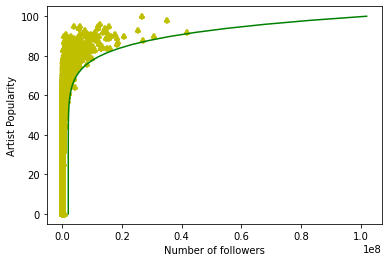

In [25]:
ax = plt.axes()
plt.scatter(artists_df.followers, artists_df.artist_popularity, c="y", marker=r'$\clubsuit$')
y = np.linspace(0, 100)
x = np.linspace(0, 40000000)
plt.plot(y**10/(10**12)+2*10**6, y, linestyle='solid', c="g")
plt.xlabel("Number of followers")
plt.ylabel("Artist Popularity")
plt.show()

In [26]:
albums_df["release_date"] = pd.to_datetime(albums_df["release_date"])

In [27]:
albums_df["release_date"].min(), albums_df["release_date"].max()

(Timestamp('1886-01-01 00:00:00'), Timestamp('2019-04-26 00:00:00'))

In [28]:
albums_df['release_date'] = pd.DatetimeIndex(albums_df['release_date']).year

In [29]:
years = albums_df.release_date.unique()
years

array([2019, 2016, 2018, 1980, 2015, 1976, 2014, 2017, 1986, 2013, 1998,
       2006, 2000, 2005, 1996, 1985, 2007, 1977, 1979, 1999, 2003, 1982,
       1987, 2011, 1962, 1975, 2009, 2012, 1992, 1997, 2002, 2004, 1995,
       1972, 1994, 2008, 1971, 1990, 1991, 1988, 1989, 1993, 1970, 1984,
       1964, 2010, 2001, 1963, 1983, 1973, 1954, 1981, 1951, 1965, 1960,
       1974, 1959, 1958, 1968, 1969, 1961, 1938, 1967, 1946, 1978, 1945,
       1949, 1955, 1966, 1936, 1957, 1956, 1933, 1937, 1952, 1953, 1947,
       1950, 1886, 1934, 1935, 1939, 1928, 1926, 1948, 1942, 1944, 1923])

In [30]:
L = []
for year in years:
    L.append((albums_df.loc[albums_df.release_date == year]).count())
albums_counter = []
for i in range(len(L)):
    albums_counter.append(L[i][0])

In [31]:
data_dataframe = pd.DataFrame({'year': years, 'count': albums_counter })
data_dataframe.sort_values(by='year', ascending=False, na_position='first', inplace=True)
data_dataframe.head(2)

,year,count
0,2019,11125
2,2018,22050


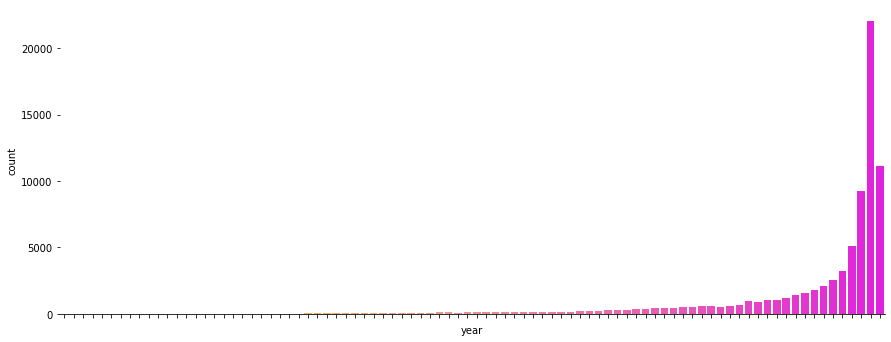

In [32]:
g = sns.catplot(data=data_dataframe, kind="bar", x="year", y="count", palette="spring_r")
g.fig.set_size_inches(15,5)
g.despine(left=True)
g.set(xticklabels=[])

In [33]:
key_dataframe = pd.DataFrame({'key': tracks_df.key, 'track_popularity_mean': tracks_df.track_popularity})
key_dataframe.groupby(['key'], as_index=True)\
    .aggregate({'track_popularity_mean': 'mean'})

,track_popularity_mean
key,
0.0,39.661076
1.0,40.365265
2.0,39.075931
3.0,39.486216
4.0,40.137582
5.0,39.784300
6.0,40.302480
7.0,39.443812
8.0,40.657842


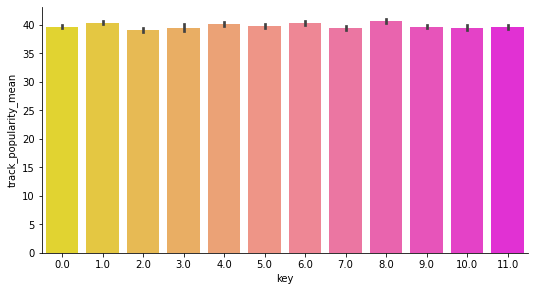

In [34]:
m = sns.catplot(data=key_dataframe, kind="bar", x="key", y="track_popularity_mean", palette="spring_r")
m.fig.set_size_inches(8,4)

In [35]:
((tracks_df.loc[tracks_df.key == 8]).loc[tracks_df.track_popularity == 80]).iloc[0:1]

,acousticness,artists_id,country,danceability,duration_ms,energy,track_id,instrumentalness,key,liveness,loudness,track_popularity,speechiness,tempo,time_signature,track_number,valence
39001,0.192,4A7HeXSd4HtQuf6IR5XZ1b,2,0.787,-0.160535,0.839,5z3vuYzS9UF6rD6TmBEdUf,0.0,8.0,0.0805,-3.594,80.0,0.217,154.086,4.0,1.0,0.799


In [36]:
tempo_1_dataframe = pd.DataFrame({'tempo': tracks_df.loc[tracks_df.track_popularity > 85].tempo, 'track_popularity': tracks_df.loc[tracks_df.track_popularity > 85].track_popularity})
tempo_2_dataframe = pd.DataFrame({'tempo': tracks_df.loc[tracks_df.track_popularity < 11].tempo, 'track_popularity': tracks_df.loc[tracks_df.track_popularity < 11].track_popularity})
pd.merge(tempo_1_dataframe.groupby(['track_popularity'], as_index=False).aggregate({'tempo': 'mean'}), tempo_2_dataframe.groupby(['track_popularity'], as_index=False).aggregate({'tempo': 'mean'}), left_index=True, right_index=True)

,track_popularity_x,tempo_x,track_popularity_y,tempo_y
0,86.0,121.448528,0.0,82.873958
1,87.0,120.241333,1.0,108.065763
2,88.0,104.558200,2.0,110.746855
3,89.0,122.253125,3.0,112.024191
4,90.0,125.874000,4.0,113.754975
5,91.0,109.563500,5.0,111.812554
6,92.0,108.634400,6.0,112.445090
7,93.0,134.351833,7.0,112.763367
8,94.0,135.007500,8.0,113.588387
9,95.0,112.158125,9.0,112.259830


In [37]:
tracks_df.shape, artists_df.shape

((101939, 17), (56129, 6))

In [38]:
extended_tracks_df = pd.merge(tracks_df, artists_df[['artists_id', 'artist_popularity']], on='artists_id')
extended_tracks_df.shape

(77845, 18)

In [39]:
extended_tracks_df = pd.merge(tracks_df, artists_df[['artists_id', 'artist_popularity']], on='artists_id')
extended_tracks_df.head()

,acousticness,artists_id,country,danceability,duration_ms,energy,track_id,instrumentalness,key,liveness,loudness,track_popularity,speechiness,tempo,time_signature,track_number,valence,artist_popularity
0,0.294,3mxJuHRn2ZWD5OofvJtDZY,1,0.698,-0.058745,0.606,5qljLQuKnNJf4F4vfxQB0V,0.000003,10.0,0.151,-7.447,28.0,0.0262,115.018,4.0,1.0,0.622,28
1,0.166,3mxJuHRn2ZWD5OofvJtDZY,2,0.543,-0.067073,0.612,3THTkAwJOsmxgizvYkBNRI,0.000000,9.0,0.129,-7.685,37.0,0.0487,139.876,3.0,1.0,0.463,28
2,0.863,4xWMewm6CYMstu0sPgd9jJ,1,0.719,2.154012,0.308,3VAX2MJdmdqARLSU5hPMpm,0.000000,6.0,0.253,-10.340,31.0,0.9220,115.075,3.0,3.0,0.589,36
3,0.824,4xWMewm6CYMstu0sPgd9jJ,1,0.688,-1.142312,0.304,1WJzRtI1ABzV3TPIeJZVvi,0.000000,10.0,0.142,-9.960,0.0,0.5310,77.056,3.0,2.0,0.414,36
4,0.850,4xWMewm6CYMstu0sPgd9jJ,1,0.632,1.316609,0.372,65MopnhsXOgYw4RuiA2pGU,0.000000,7.0,0.110,-8.760,30.0,0.9350,84.486,4.0,8.0,0.611,36


Text(0.5, 1.0, 'Correlation matrix')

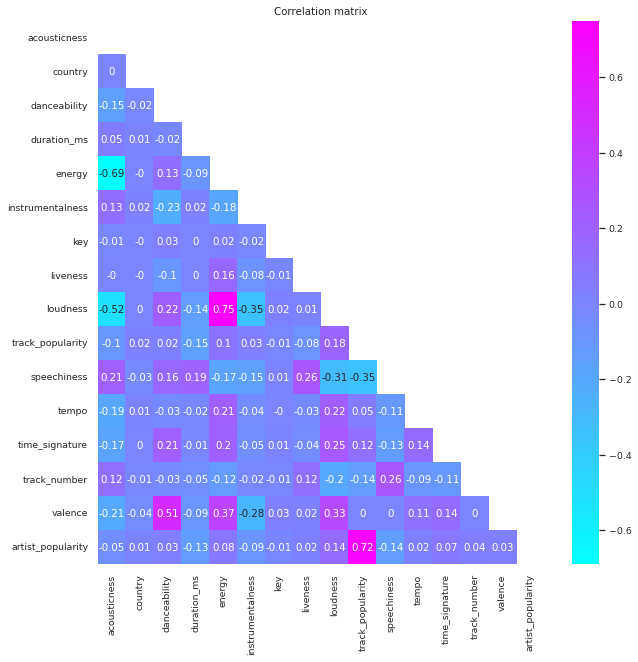

In [40]:
corr=extended_tracks_df.corr().round(2)

sns.set(font_scale=0.85)
plt.figure(figsize=(10, 10))
sns.set_palette("bright")
sns.set_style("white")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,cmap='cool',mask=mask,cbar=True)
plt.title('Correlation matrix')

In [41]:
extended_tracks_df = extended_tracks_df.drop(['energy'], axis=1)

In [42]:
extended_tracks_df.track_popularity.max()

97.0

In [43]:
extended_tracks_df.head(2)

,acousticness,artists_id,country,danceability,duration_ms,track_id,instrumentalness,key,liveness,loudness,track_popularity,speechiness,tempo,time_signature,track_number,valence,artist_popularity
0,0.294,3mxJuHRn2ZWD5OofvJtDZY,1,0.698,-0.058745,5qljLQuKnNJf4F4vfxQB0V,0.000003,10.0,0.151,-7.447,28.0,0.0262,115.018,4.0,1.0,0.622,28
1,0.166,3mxJuHRn2ZWD5OofvJtDZY,2,0.543,-0.067073,3THTkAwJOsmxgizvYkBNRI,0.000000,9.0,0.129,-7.685,37.0,0.0487,139.876,3.0,1.0,0.463,28


In [44]:
merged_tracks_df = pd.merge(extended_tracks_df, audio_features_df, on='track_id')
merged_tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72867 entries, 0 to 72866
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   acousticness         72867 non-null  float64
 1   artists_id           72867 non-null  object 
 2   country              72867 non-null  int64  
 3   danceability         72867 non-null  float64
 4   duration_ms          72867 non-null  float64
 5   track_id             72867 non-null  object 
 6   instrumentalness     72867 non-null  float64
 7   key                  72867 non-null  float64
 8   liveness             72867 non-null  float64
 9   loudness             72867 non-null  float64
 10  track_popularity     72867 non-null  float64
 11  speechiness          72867 non-null  float64
 12  tempo                72867 non-null  float64
 13  time_signature       72867 non-null  float64
 14  track_number         72867 non-null  float64
 15  valence              72867 non-null 

In [45]:
merged_tracks_df.head(2)

,acousticness,artists_id,country,danceability,duration_ms,track_id,instrumentalness,key,liveness,loudness,...,time_signature,track_number,valence,artist_popularity,mean_syllables_word,mean_words_sentence,n_sentences,n_words,sentence_similarity,vocabulary_wealth
0,0.294,3mxJuHRn2ZWD5OofvJtDZY,1,0.698,-0.058745,5qljLQuKnNJf4F4vfxQB0V,0.000003,10.0,0.151,-7.447,...,4.0,1.0,0.622,28,1.39,3.13,39,208,0.028340,0.64
1,0.166,3mxJuHRn2ZWD5OofvJtDZY,2,0.543,-0.067073,3THTkAwJOsmxgizvYkBNRI,0.000000,9.0,0.129,-7.685,...,3.0,1.0,0.463,28,1.25,2.67,81,363,0.349074,0.16


In [46]:
merged_tracks_df.shape

(72867, 23)

In [47]:
tracks_df_test = merged_tracks_df.sample(n=10000, random_state=1)
tracks_df_train = merged_tracks_df.drop(tracks_df_test.index)
X_train = tracks_df_train.drop(columns = ['artists_id', 'track_id', 'track_popularity'])
y_train = tracks_df_train.track_popularity
X_test = tracks_df_test.drop(columns = ['artists_id', 'track_id', 'track_popularity'])
y_test = tracks_df_test.track_popularity

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)
first_predictions = model.predict(X_test)
first_predictions
y_test
eps = first_predictions - y_test
eps

67989    -2.032088
37969     5.063074
61508    -8.499036
36423    23.845394
31477    -3.230747
           ...    
12352    15.306045
39745    -3.795695
7646      4.536455
11696    -2.940603
16140   -10.298829
Name: track_popularity, Length: 10000, dtype: float64

In [49]:
from sklearn.metrics import mean_squared_error
print("Mean squared error: %.2f"
    % mean_squared_error(y_test, first_predictions))

Mean squared error: 115.08


In [50]:
counter = 0
for i in eps:
    if abs(i) > 20: counter+=1
counter   

517

In [ ]:
from google.colab import drive
drive.mount('/content/drive')